# **Exploratory Data Analysis (EDA)**

In this section, we shall investigate and understand the data provided.

### **Imports and data loading**

In [21]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("tiktok_dataset.csv")

### **Understanding the data**

In [22]:
# Display and examine the first 10 rows of the dataframe

data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [23]:
# Get data shape

data.shape

(19382, 12)

*The dataframe contains categorical, text, and numerical data. Each row represents a TikTok video that presents either a claim or an opinion and the metadata of that video.*

In [24]:
# Get summary info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


*The dataframe contains float64s, int64s and objects. There are 19,382 observations. Some of the variables have missing values.*

In [25]:
# Check for missing values

data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

*There are a total of 12 columns, whereby 7 of those columns have 298 missing values each.*

In [26]:
# Get summary statistics

data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


*Many of the count variables seem to have outliers at the high end of the distribution. Their standard deviations are large and they have maximum values that are very high compared to their quartile values.*

### **Understanding the variables**

Since our objective is to classify videos as either claims or opinions, we will investigate the `claim_status` variable to better understand it.

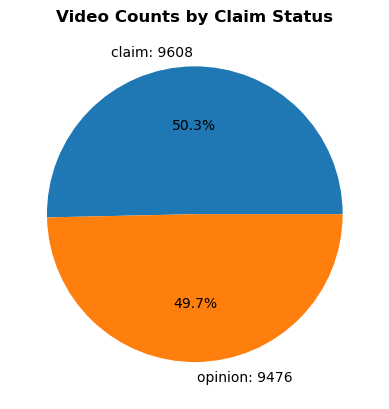

In [78]:
# Pie chart for claim status
cs = data['claim_status'].value_counts()

plt.pie(cs,
        labels= [f'{cs.index[0]}: {cs.values[0]}',
                 f'{cs.index[1]}: {cs.values[1]}'],
                 autopct = '%1.1f%%')
plt.title('Video Counts by Claim Status', weight='bold');

*The counts of each claim status seem relatively balanced.*

*Seems like there are more banned users and users under review in the claim videos than there are in the opinion videos.*

Let's investigate `author_ban_status`.

In [30]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

*Despite having a high number of videos by active users, banned users and users under review get a lot more views, likes and shares.*

### **Creating new features**

We create three new columns to better understand engagement rates:
* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video

In [28]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

In [29]:
data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

*From the table above, we can see that the engagement is less about the user ban status and more about the video claim status.*<br>
*Claim based videos have higher engagement rates across all three metrics: likes/view, comments/view and shares/view.*

### **Data distribution**

Next, we plot histograms and boxplots to examine the distribution of the features. We will create a helper function that creates histograms and boxplots as defined below.

In [127]:
def hist_boxplot(column_name, bins=None, **kwargs):
    """
    Plot histogram and boxplot for a specified column.

    Args:
    - column_name (str): column name
    - bins (int, sequence, or str, optional): specification of histogram bins.
    - **kwargs: Additional keyword arguments passed to seaborn histplot.
    """

    # Create a grid of plots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 2))

    # Plot histogram on the first subplot
    ax1 = sns.histplot(x=data[column_name], ax=axes[0], bins=bins, **kwargs)
    ax1.set_title(f'{column_name} histogram', fontsize=10, weight='bold')

    # Plot boxplot on the second subplot
    ax2 = sns.boxplot(x=data[column_name], ax=axes[1])
    ax2.set_title(f'{column_name} boxplot', fontsize=10, weight='bold')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

`video_duration_sec`

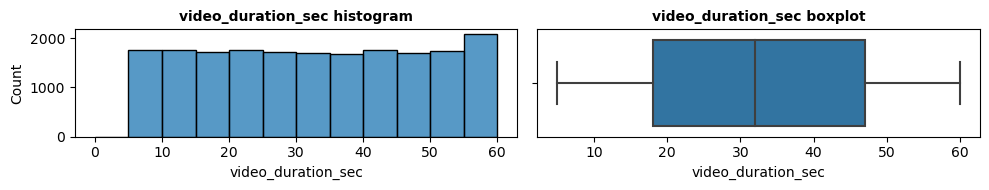

In [128]:
hist_boxplot('video_duration_sec', range(0, 61, 5))

*All videos are 5-60 seconds in length, and the distribution is uniform.*

`video_view_count`

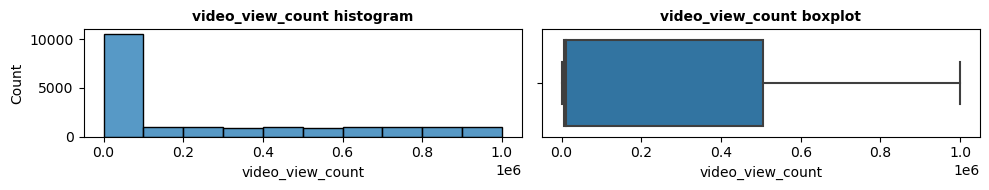

In [129]:
hist_boxplot('video_view_count', bins=range(0,(10**6+1),10**5))

*It has a very uneven distribution, with majority of the videos receiving fewer than 100,000 views. Distribution of view counts more than 100,000 views is uniform.*

`video_like_count`

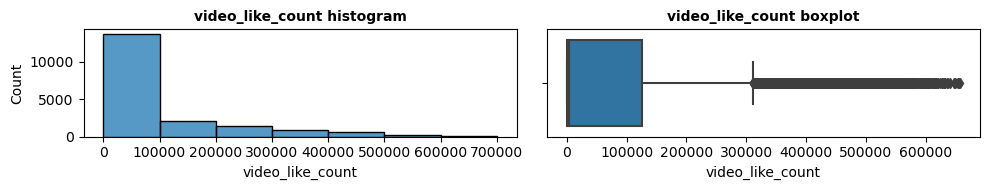

In [130]:
hist_boxplot('video_like_count', bins=range(0,(7*10**5+1),10**5))

*It is a heavily right-skewed distribution, where there are more videos with less than 100,000 likes. There are also a number of videos on the upper extremity as seen in the boxplot.*

`video_comment_count`

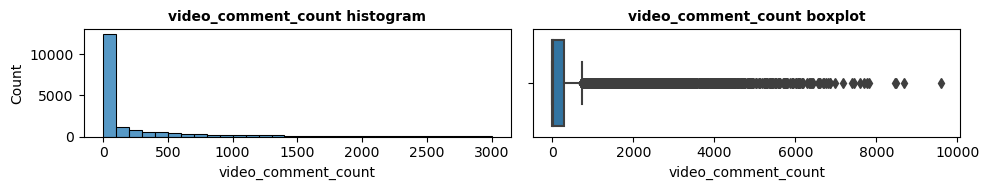

In [131]:
hist_boxplot('video_comment_count', bins=range(0,(3001),100))

*Again, this variable's distribution is also very right-skewed. Most videos have less than 100 comments.*

`video_share_count`

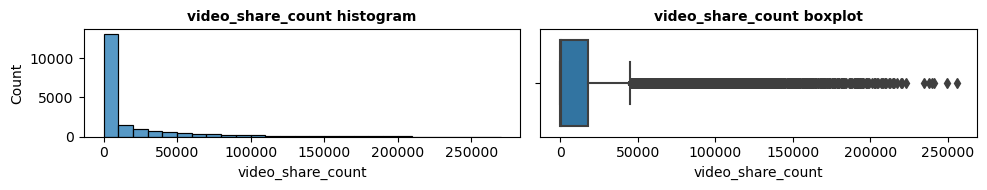

In [135]:
hist_boxplot('video_share_count', bins=range(0, 270001, 10000))

*Also very right-skewed distribution for video share count. Most videos were shared less than 10,000 times.*

`video_download_count`

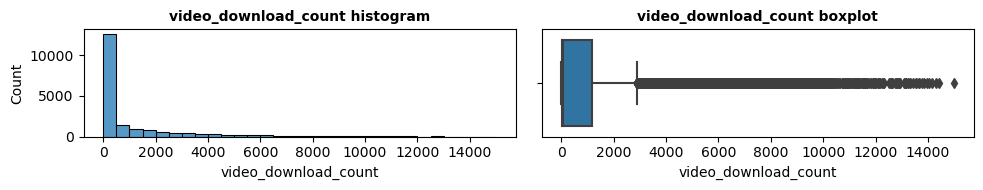

In [134]:
hist_boxplot('video_download_count', bins=range(0, 15001, 500))

*Just like most of the other variables, video download count also has a very right-skewed distribution with most of the download counts being less than 500 times. However, there are also videos that were downloaded up to 14,000 times.*

### **Exploring the relationship between claim status, user ban status, and verification status**

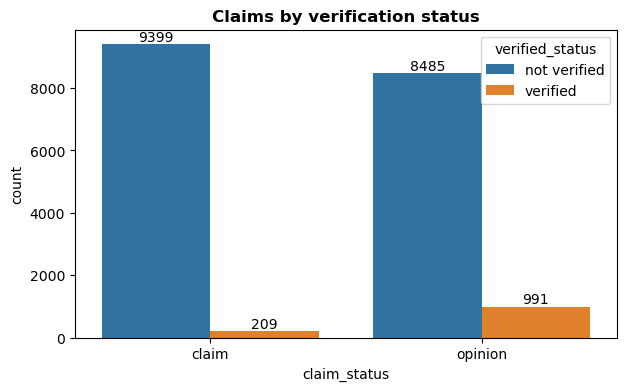

In [81]:
# Visualization of claim status by verification status
plt.figure(figsize=(7,4))
a = sns.countplot(data=data,
                  x='claim_status',
                  hue='verified_status')

for bars in a.containers:
  a.bar_label(bars)

plt.title('Claims by verification status', weight='bold');

*The number of verified users is a lot less than those who are not verified. It is also interesting to see that verified users are almost 5x more likely to post opinion videos.*

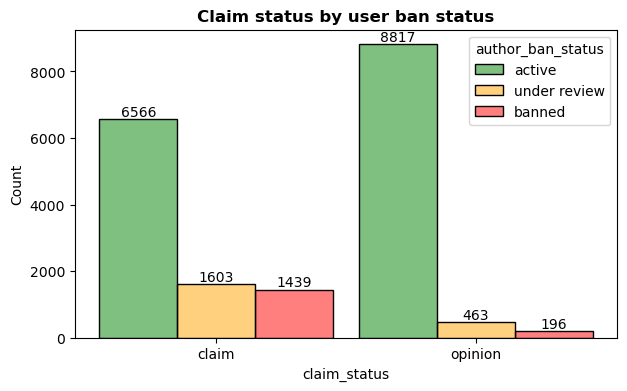

In [144]:
# Get counts for each group combination of claim status and user ban status

fig = plt.figure(figsize=(7,4))
ax = sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Claim status by user ban status', weight='bold');

*There's a lot more active users posting opinion videos compared to claim videos. It also seems like those who post more claim videos are more likely to be under review or banned.*

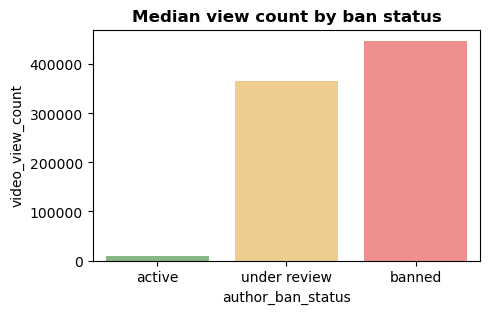

In [145]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status', weight='bold');

*The median view count for users under review or banned are a lot more compared to active users. Since we now know more non-active users are more likely to post claim videos and that the median view count for their videos are a lot higher, this variable is something to take note of and worth exploring further.*

In [156]:
# Median view count by claim status

data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

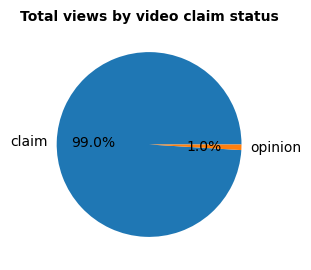

In [162]:
# Total view count by claim status

fig = plt.figure(figsize=(3,3))
views = data.groupby('claim_status')['video_view_count'].sum()
plt.pie(views,
        labels = [f'{views.index[0]}', f'{views.index[1]}'],
        autopct = '%1.1f%%')
plt.title('Total views by video claim status', size=10, weight='bold');

*Despite having roughly the same number of claims and opinions videos in the dataset, the total view count for claims accounts for 99% of the total views.*

### **Determine outliers**

From our findings above, there are many variables with outliers. A common practice to determine outliers is by calculating the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.
<br>Since the values for the count variables are right-skewed, we will do a modified version of this, which is to calculate the median value for each variable and then adding 1.5 * IQR. 

In [167]:
# Calculate outliers

# List of variables with outliers
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]
# Empty list for outlier data
outlier_data = []

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()

    # Outlier treshold
    outlier_threshold = median + 1.5*iqr

    # Values that exceed the treshold
    outlier_count = (data[column] > outlier_threshold).sum()

    # Append data to the list
    outlier_data.append({
       'column_name': column,
       'outlier_threshold': outlier_threshold,
       'outlier_count': outlier_count
    })

    # Convert list to dataframe
    outliers = pd.DataFrame(outlier_data)

In [166]:
# View outlier dataframe
outliers

,column_name,outlier_threshold,outlier_count
0,video_view_count,759031.250,2343
1,video_like_count,189717.375,3468
2,video_share_count,27877.500,3732
3,video_download_count,1769.875,3733
4,video_comment_count,445.500,3882


### **Scatterplots**

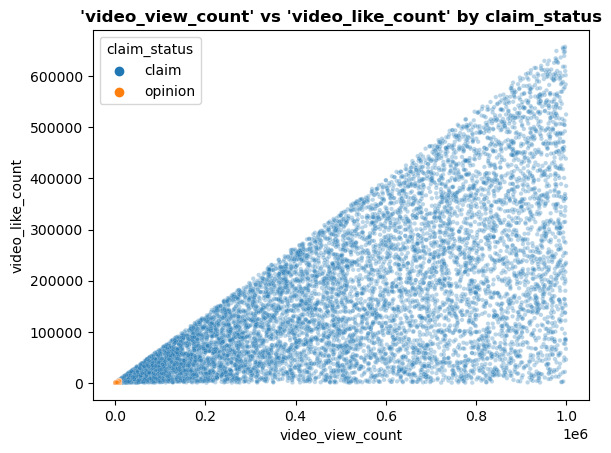

In [182]:
# Scatterplot of `video_view_count` vs `video_like_count` by 'claim_status'
sns.scatterplot(x=data["video_view_count"],
                y=data["video_like_count"],
                hue=data["claim_status"],
                s=10, alpha=.3)
plt.title("'video_view_count' vs 'video_like_count' by claim_status", weight='bold');
plt.show()

*The scatterplot indicates that there is some kind of positive relationship between video_view_count and video_like_count.<br>However, this relationship is not linear across all videos. Since opinion videos have a lot smaller number of view counts, let's take a look at that.*

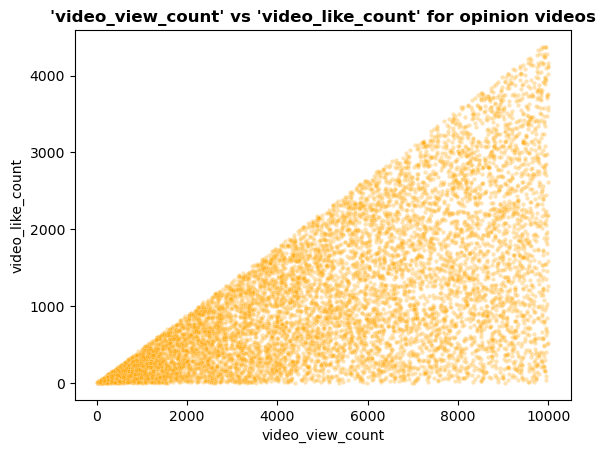

In [181]:
# Scatterplot of `video_view_count` vs `video_like_count` for opinion videos
sns.scatterplot(data=data[data["claim_status"]=="opinion"],
                x="video_view_count",
                y="video_like_count",
                color='orange',
                s=10,
                alpha=.3)
plt.title("'video_view_count' vs 'video_like_count' for opinion videos", weight='bold');
plt.show()

*The scatterplot for opinion videos show the same type of relationship as indicated above albeit on a much smaller scale.*

### **Summary**
* The objective of this project is to develop a machine learning model classifying videos as either an opinion video or claims video. Of the ~20k samples in this dataset, 50.3% of the videos are 'claim' videos and 49.7% are 'opinion' videos. This balanced count makes the target class `claim_status` a suitable foundation for model training.
* It is important to note that there is a huge discrepency between the total view counts for opinion and claims based videos.
* Non-active users are more likely to post claims videos, which also garners more views compared to active users. View count could be a strong indicator of claim status.
* There are still many features that we should explore to gain a deeper understanding into the attributes that classifies a video between a claim based or an opinion based one.